Definitions

Recency - days since last customer transaction

Frequency - number of transactions in the last 12 months

Monetary Value - total spend in the last 12 months

## Data Preparation

In [38]:
#import librarys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler

In [2]:
#import Dataset
retail = pd.read_excel('Online Retail.xlsx')

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Pre-Processing Data

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Duplicated Value

In [4]:
retail.duplicated().sum()

5268

In [5]:
total_data = len(retail)
total_duplicates = retail.duplicated().sum()
percentage_duplicates = (total_duplicates / total_data) * 100
percentage_duplicates

0.9721189350979592

In [6]:
retail = retail.drop_duplicates()
retail.duplicated().sum()

0

### Missing Value

In [7]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [8]:
missing_percentage = retail.isna().mean() * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

In [9]:
# Isi nilai yang hilang dengan 'Unknown' atau ID unik lainnya
retail['CustomerID'].fillna('Unknown', inplace=True)
retail['Description'].fillna('Unknown', inplace=True)

retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Dataset Check

In [10]:
retail.describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [11]:
# Filter data di mana Quantity < 0
filtered_df = retail[retail['Quantity'] < 0]

# Hitung jumlah baris yang memenuhi kriteria
jumlah = filtered_df.shape[0]
total = retail.shape[0]
persentase = (jumlah / total) * 100

print("Quantity < 0:", jumlah)
print("% Quantity < 0 :", persentase, "%")

Quantity < 0: 10587
% Quantity < 0 : 1.9728272718633126 %


In [12]:
# Filter data di mana UnitPrice < 0
filtered_df = retail[retail['UnitPrice'] < 0]

# Hitung jumlah baris yang memenuhi kriteria
jumlah = filtered_df.shape[0]
total = retail.shape[0]
persentase = (jumlah / total) * 100

print("UnitPrice < 0:", jumlah)
print("% UnitPrice < 0 :", persentase, "%")


UnitPrice < 0: 2
% UnitPrice < 0 : 0.00037268863169232316 %


In [13]:
# Filter data untuk memilih baris di mana Quantity > 0 dan UnitPrice > 0
retail_df = retail[(retail['Quantity'] > 0) & (retail['UnitPrice'] > 0)]

# Menampilkan deskripsi statistik dari DataFrame yang telah difilter
retail_df.describe()

,Quantity,UnitPrice
count,524878.000000,524878.000000
mean,10.616600,3.922573
std,156.280031,36.093028
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,11.000000,4.130000
max,80995.000000,13541.330000


## RFM Segmentation

### RFM Metrics

In [14]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
retail_df['TotalSum'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_13032\4262707614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['TotalSum'] = retail_df['Quantity'] * retail_df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
print('Min:{}; Max:{}'.format(min(retail_df.InvoiceDate),
max(retail_df.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [17]:
snapshot_date = max(retail_df.InvoiceDate) + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [18]:
# Aggregate data on a customer level
datamart = retail_df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})
# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSum': 'MonetaryValue'}, inplace=True)
# Check the first rows
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


### RFM Segments

In [19]:
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
datamart = datamart.assign(R = r_quartiles.values)
datamart

,Recency,Frequency,MonetaryValue,R
CustomerID,,,,
12346.0,326,1,77183.60,1
12347.0,2,182,4310.00,4
12348.0,75,31,1797.24,2
12349.0,19,73,1757.55,3
12350.0,310,17,334.40,1
...,...,...,...,...
18281.0,181,7,80.82,1
18282.0,8,12,178.05,4
18283.0,4,721,2045.53,4


In [20]:
f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)
datamart

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2
...,...,...,...,...,...,...
18281.0,181,7,80.82,1,1,1
18282.0,8,12,178.05,4,1,1
18283.0,4,721,2045.53,4,4,4


In [21]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4
...,...,...,...,...,...,...,...,...
18281.0,181,7,80.82,1,1,1,1.01.01.0,3
18282.0,8,12,178.05,4,1,1,4.01.01.0,6
18283.0,4,721,2045.53,4,4,4,4.04.04.0,12


### Analyzing RFM Segments

In [22]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
4.04.04.0    450
1.01.01.0    381
3.04.04.0    217
1.02.02.0    206
2.01.01.0    179
2.03.03.0    168
3.03.03.0    164
2.02.02.0    158
4.03.03.0    149
3.02.02.0    132
dtype: int64

In [23]:
datamart.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           260.7       8.2         157.4   381
4           177.2      13.6         240.0   388
5           152.9      21.2         366.6   518
6            96.0      27.9         820.5   458
7            79.5      38.0         758.3   462
8            64.1      56.0         987.3   454
9            45.9      78.7        1795.1   414
10           32.4     110.5        2056.4   426
11           21.3     187.2        4055.8   388
12            7.2     661.0       13182.0   450

In [24]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'

datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
datamart.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            218.6      10.9         199.1   769
Gold               26.4     268.0        5437.9  1678
Silver             99.9      35.3         721.1  1892

## Data Processing

### Manage Skewness

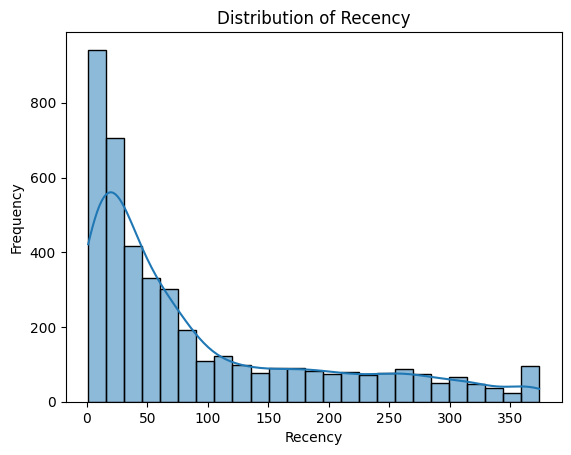

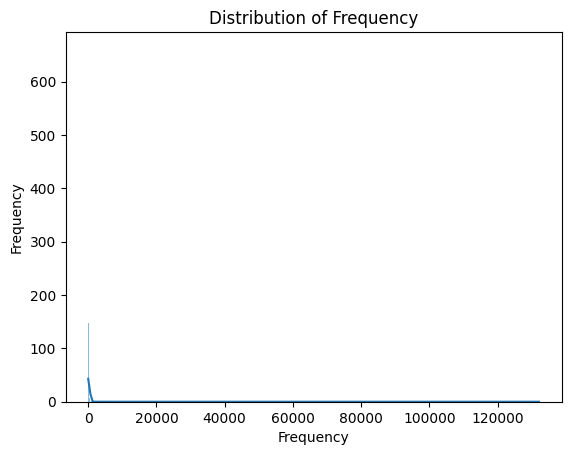

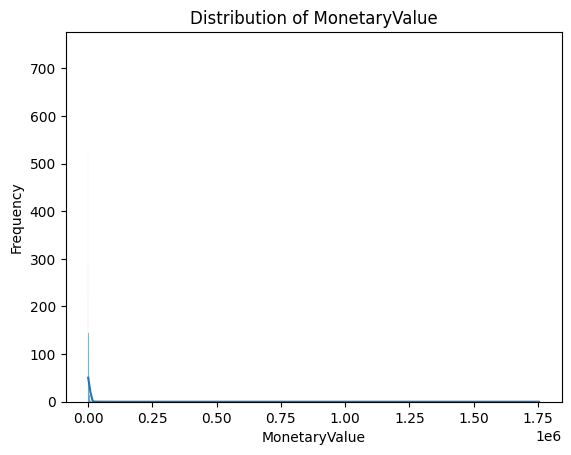

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar kolom yang akan ditampilkan histplot-nya
columns = ['Recency', 'Frequency', 'MonetaryValue']

# Mengulang setiap kolom dalam daftar
for column in columns:
    sns.histplot(datamart[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


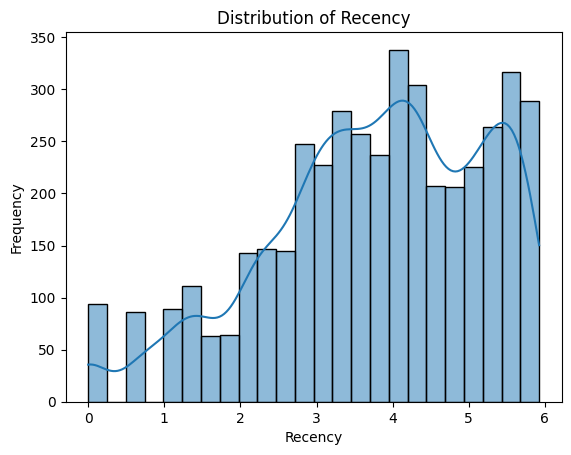

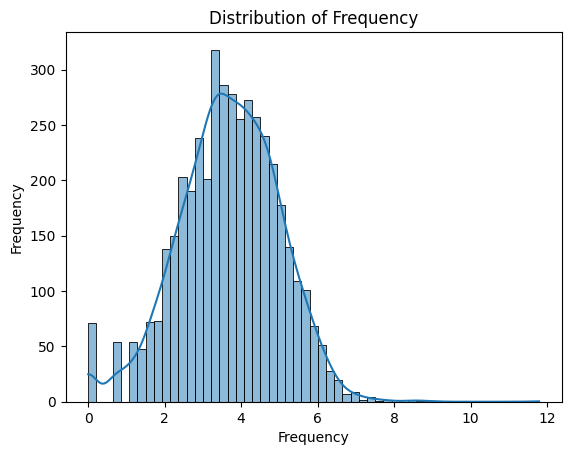

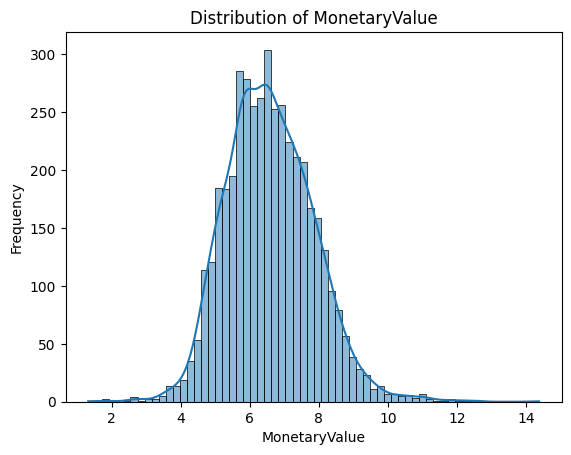

In [32]:
# Daftar kolom yang akan ditransformasi
columns = ['Recency', 'Frequency', 'MonetaryValue']
    
for column in columns:
    column_log = np.log(datamart[column])
    sns.histplot(column_log, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Centering & Scalling Variable

In [73]:
datamart_rfm = pd.DataFrame(datamart.reset_index())
datamart_rfm = datamart_rfm[['Recency','Frequency','MonetaryValue']]
datamart_rfm.head()

,Recency,Frequency,MonetaryValue
0,326,1,77183.60
1,2,182,4310.00
2,75,31,1797.24
3,19,73,1757.55
4,310,17,334.40


In [74]:
datamart_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4339 non-null   int64  
 1   Frequency      4339 non-null   int64  
 2   MonetaryValue  4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 101.8 KB


In [75]:
datamart_rfm.mean()

Recency            92.515326
Frequency         120.967504
MonetaryValue    2452.664394
dtype: float64

In [76]:
datamart_rfm.std()

Recency            100.012295
Frequency         2018.000172
MonetaryValue    28086.062965
dtype: float64

In [77]:
datamart_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4339.000000,4339.000000,4.339000e+03
mean,92.515326,120.967504,2.452664e+03
std,100.012295,2018.000172,2.808606e+04
min,1.000000,1.000000,3.750000e+00
25%,18.000000,17.000000,3.065050e+02
50%,51.000000,41.000000,6.685800e+02
75%,142.000000,98.000000,1.660890e+03
max,374.000000,132186.000000,1.754902e+06


In [78]:
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm) 
print('mean: ', datamart_normalized.mean(axis=0).round(2))
print('std: ', datamart_normalized.std(axis=0).round(2))

mean:  [0. 0. 0.]
std:  [1. 1. 1.]
